# Feature Selection

When there are too many features, the model may get trained on irrelevant or noisy data, leading to the *curse of dimensionality*.

To reduce the number of dimensions, we use:
- **Feature Selection** – selecting a subset of important input features.  
- **Feature Extraction** – combining or transforming existing features (for example, PCA).

---

## Types of Feature Selection Methods

### 1. Filter Method
- Checks the relevance of each feature with respect to the output variable.  
- **Workflow:**  
All Features → Select Best Subset → Apply ML Algorithm
- **Common statistical tests:**
- Chi-Squared Test  
- ANOVA Test  
- Correlation Coefficient  

These methods are fast and independent of any specific machine learning algorithm.

---

### 2. Wrapper Method
- Uses the model’s performance to evaluate which features work best together.  
- **Drawback:** Computationally expensive because the model is trained repeatedly.

**Types:**
- **Forward Selection:** Start with no features, and keep adding features one by one if they improve accuracy.  
- **Backward Elimination:** Start with all features, and remove the least useful ones (those with minimal impact on the output) using statistical tests.

---

### 3. Embedded Method
- Feature selection happens while the model is being built.  
- These methods learn which features contribute the most during training.  
- However, testing all permutations and combinations can be computationally expensive.

---

### Summary

| Method Type | Key Idea | Pros | Cons |
|--------------|-----------|------|------|
| Filter | Statistical relationship between feature and output | Fast, independent of ML model | May ignore feature interactions |
| Wrapper | Selects features based on model accuracy | Considers feature interactions | Computationally heavy |
| Embedded | Learns feature importance during training | Automatic and efficient | Depends on chosen model |


# Implementation - Univariate Selection
- kind of filter method
- dataset - mobile price prediction , has 21 features of mobile we have to remove irrevelant ones

In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [74]:
data = pd.read_csv("mobile price classification dataset/train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [75]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

print(X.shape,y.shape)

(2000, 20) (2000,)


In [76]:
# apply SelectKBest top 10 featres
best_features = SelectKBest(score_func=chi2, k=10)

In [77]:
fit = best_features.fit(X,y)

In [78]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [79]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Features", "Score"]
featureScores.sort_values(by="Score", ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Implementation 2 - Feature Importance
- tree based mehthod

In [80]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [81]:
model = RandomForestClassifier()
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
model.feature_importances_

array([0.0743861 , 0.00649163, 0.0279839 , 0.00704597, 0.0249285 ,
       0.00675122, 0.0372522 , 0.02561618, 0.03936548, 0.0233304 ,
       0.03138145, 0.05609871, 0.05931298, 0.47454242, 0.02797415,
       0.02733325, 0.03075151, 0.00525655, 0.00786926, 0.00632813])

In [83]:
featureImportance =  pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

In [84]:
featureImportance

,Importance
battery_power,0.074386
blue,0.006492
clock_speed,0.027984
dual_sim,0.007046
fc,0.024928
four_g,0.006751
int_memory,0.037252
m_dep,0.025616
mobile_wt,0.039365
n_cores,0.023330


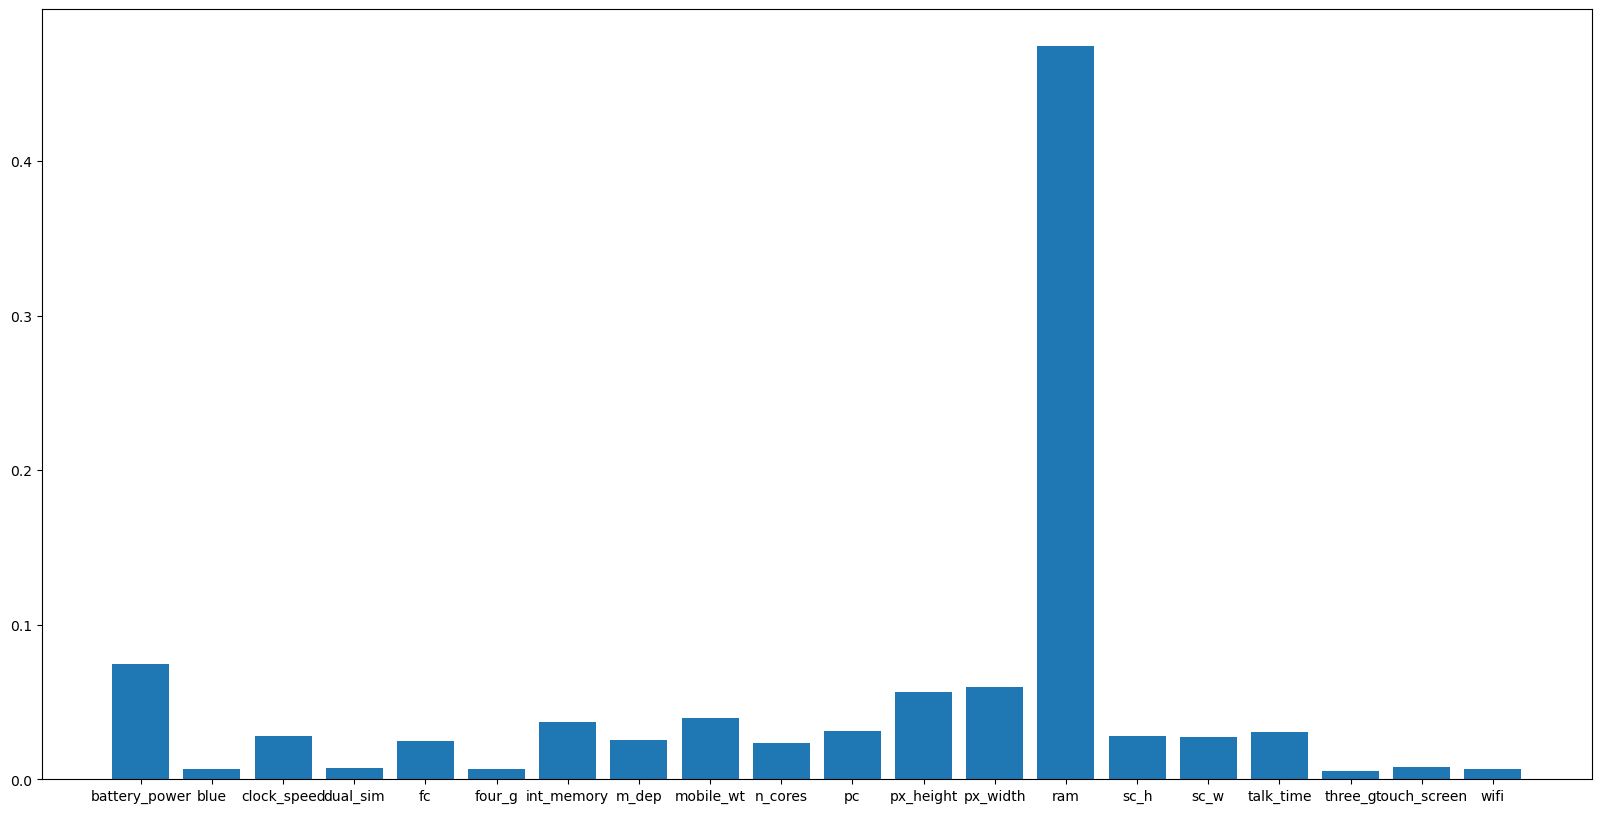

In [85]:
plt.figure(figsize=(20,10))
plt.bar(featureImportance.index, featureImportance['Importance'])
plt.show()

## Implementation 3 - Correlation Matrix

In [86]:
import seaborn as sns

In [87]:
data_corr = data.corr()
data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


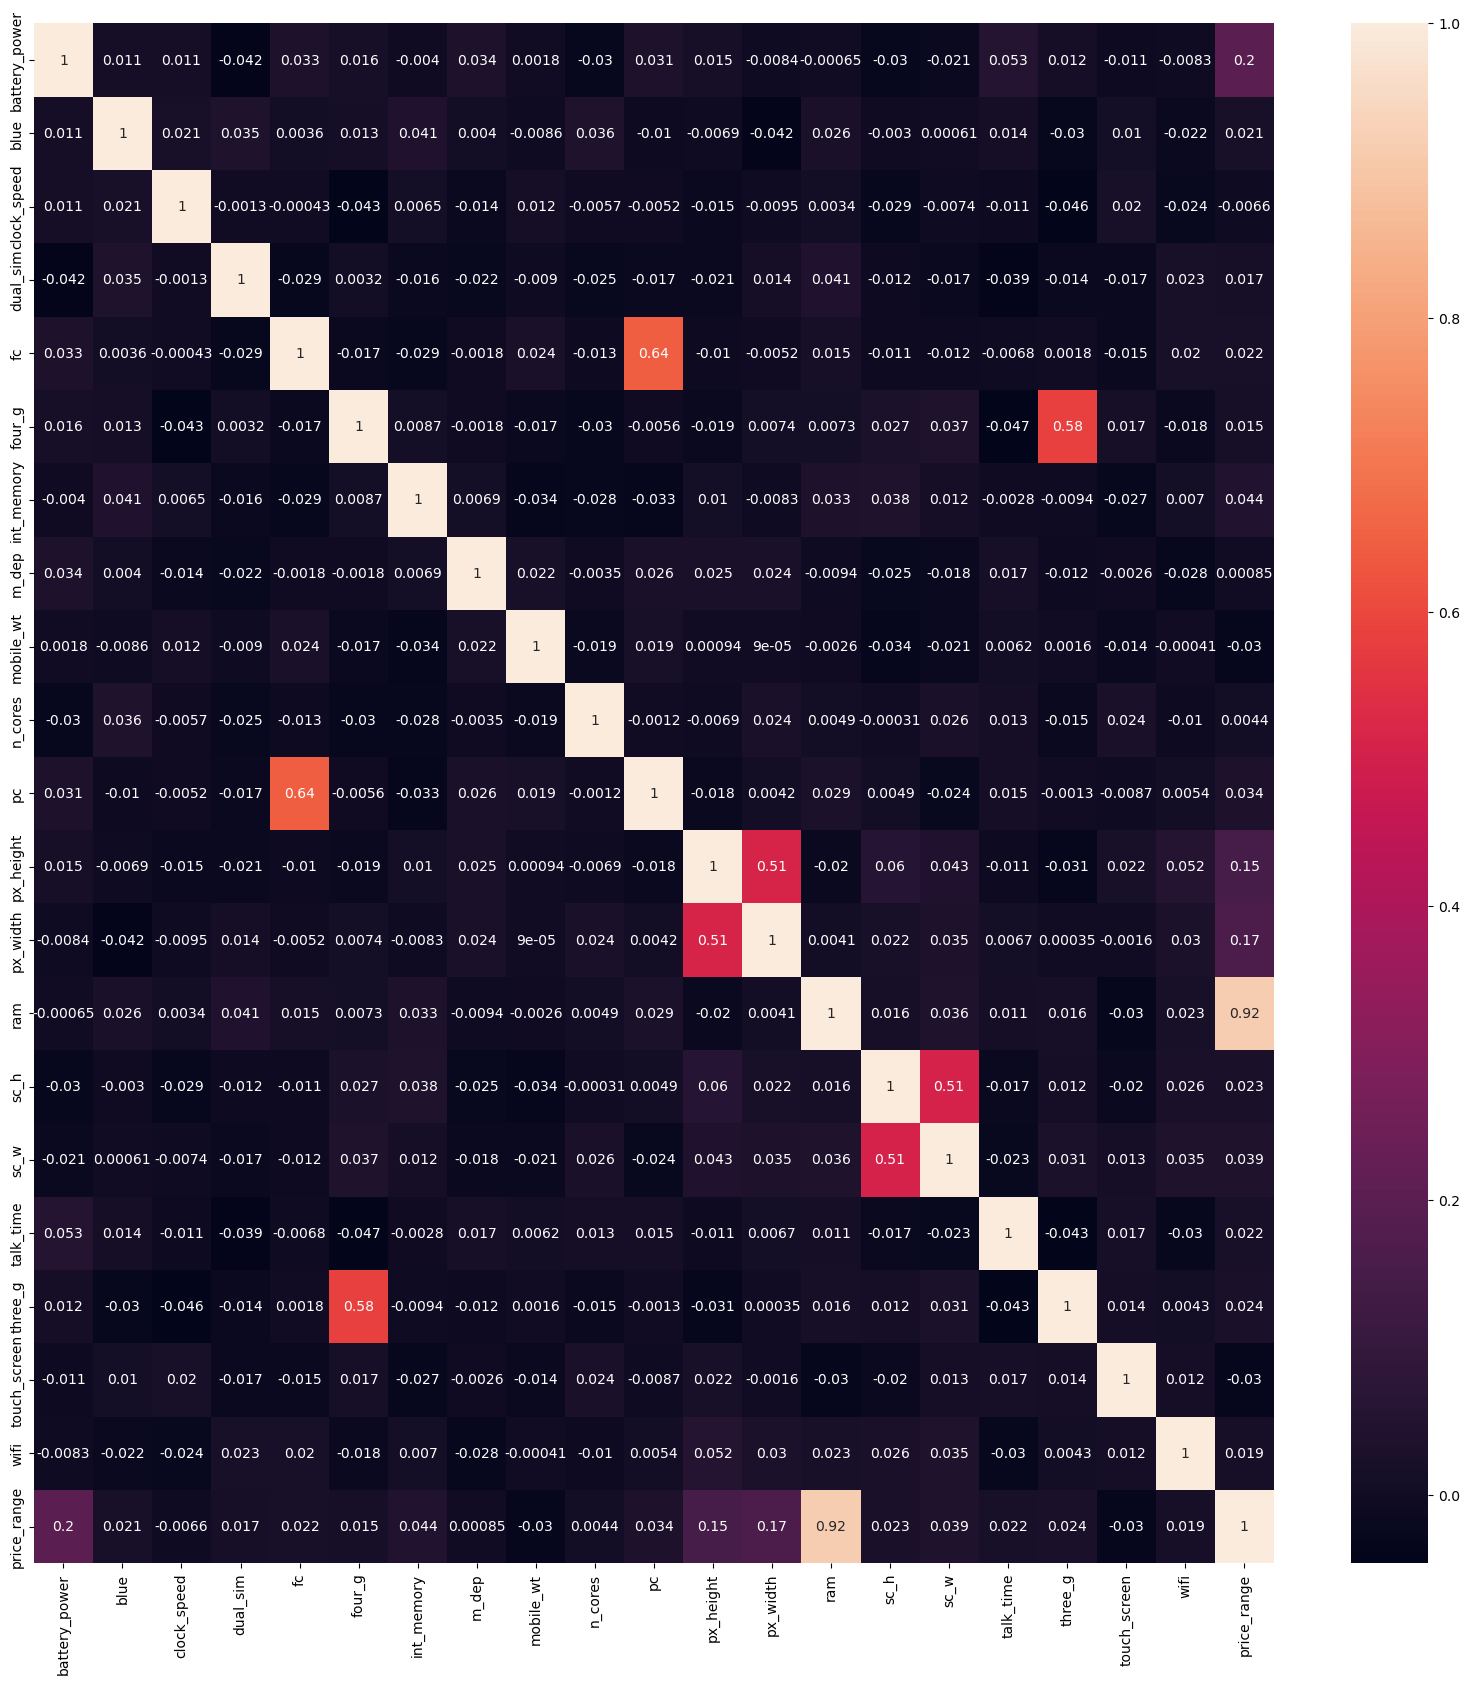

In [88]:
# we have to find the best correlation values with price_range i.e output variable
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True)
plt.show()

### Check the model performance

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [90]:
## training with all features
rfc = RandomForestClassifier(max_depth=10)

scores = cross_val_score(rfc, X, y, cv = 10)
scores.mean()

np.float64(0.8795)

In [93]:
#taking top 10 features from feature importance
ten_features = featureScores.sort_values(by="Score", ascending=False).head(10)['Features'].values
X[ten_features]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [95]:
scores_new = cross_val_score(rfc, X[ten_features], y, cv=10)
scores_new.mean()

np.float64(0.9014999999999999)